In [ ]:
"""
Yuslen Lopez



"""
import numpy as np
import matplotlib.pyplot as plt


class NeuralNetwork():

    def __init__(self,num_params=2):

        #np.random.seed(1), generates the same weights in every turn 
        #3x1 weight matrix
        #np.random generates a rand number between 0-1
        self.weight_matrix = 2* np.random.random((num_params+1,1))-1

        self.l_rate=1

    #activation function 
    def hard_limiter(self,x):
        outs=np.zeros(x.shape)
        outs[x>0]=1
        return outs
    
    #forward propagation/ dot product summation 
    def forward_propagation(self, inputs):
        outs=np.dot(inputs,self.weight_matrix)
        return self.hard_limiter(outs)
    
    #training network 
    def train(self,train_inputs,train_outputs,num_train_iterations=1000):

        for iteration in range(num_train_iterations):
            #update the preceptron base on the misclassified examples 
            for i in range (train_inputs.shape[0]):
                pred_i = self.pred(train_inputs[i,:])
                if pred_i!= train_outputs[i]:
                    output= self.forward_propagation(train_inputs[i,:])
                    #calculate error in output
                    error = train_outputs[i]-output
                    adjustment = self.l_rate*error*train_inputs[i]
                    #adjust the weight matrix
                    self.weight_matrix[:,0]+= adjustment
                    #plot the seperating line based on the weights
            print('iteration #'+str(iteration))
            plot_fun_thr(train_inputs[:,1:3],train_outputs,self.weight_matrix[:,0],classes)


    #predicting the classes of new data points 
    def pred(self,inputs):
        preds=self.forward_propagation(inputs)
        return preds
    
def plot_fun(features,labels,classes):
    plt.plot(features[labels[:]==classes[0],0], features[labels[:]==classes[0],1], 'rs',
                features[labels[:]==classes[1],0], features[labels[:]==classes[1],1, 'g^'])
    plt.axis([-1,2,-1,2])
    plt.xlabel('x: feature 1')
    plt.ylabel('y: feature 2')
    plt.legend(['Class'+str(classes[0]),'Class'+str(classes[1])])
    plt.show()

    #plotting
def plot_fun_thr(features,labels,thre_parms,classes):
    #plotting the data points 
    plt.plot(features[labels[:]==classes[0],0],features[labels[:]==classes[0],1],'rs',
            features[labels[:]==classes[1],0],features[labels[:]==classes[1],1], 'g^')
    plt.axis([-1,2,-1,2])
    #plotting the seperating line 
    x1= np.linspace(-1,2,50)
    x2 = -(thre_parms[1]*x1+thre_parms[0])/thre_parms[2] #a X1 + B X2 + c=0 --> X2 = (-a X1 + c)/b
    plt.plot(x1,x2,'-r')
    plt.xlabel('x: feature 1')
    plt.ylabel('y: feature 2')
    plt.legend(['Class'+str(classes[0]),'Class'+str(classes[1])])
    #plt.pause(0,5)
    plt.show()
    
   

    

In [47]:
features=np.array([[0,0],[0,1],[1,0],[1,1]])
print(features)
labels=np.array([0,0,0,1])
print(labels)
classes=[0,1]

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[0 0 0 1]


In [48]:
bias = np.ones((features.shape[0],1)) 

print(bias)
print(bias.shape)
features=np.append(bias,features,axis=1)
print('Features vector adding the bias')
print(features)
print(features.shape)


[[1.]
 [1.]
 [1.]
 [1.]]
(4, 1)
Features vector adding the bias
[[1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]]
(4, 3)


In [49]:
neural_network = NeuralNetwork()
print('random weights at the start of training')
print(neural_network.weight_matrix)

random weights at the start of training
[[ 0.81099779]
 [-0.47676576]
 [ 0.00322965]]


Random weights at the start of training
[[ 0.0480378 ]
 [ 0.34820263]
 [-0.79361527]]
iteration #0


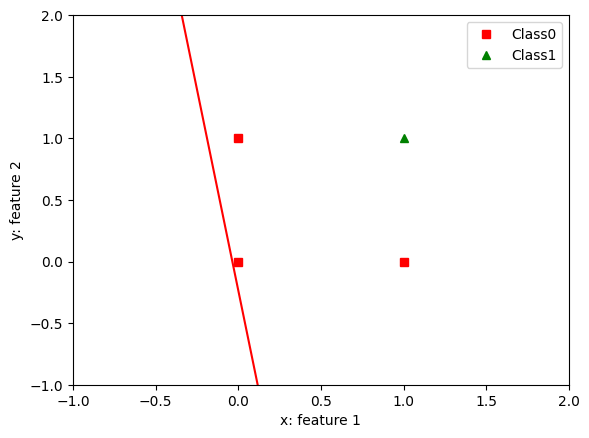

iteration #1


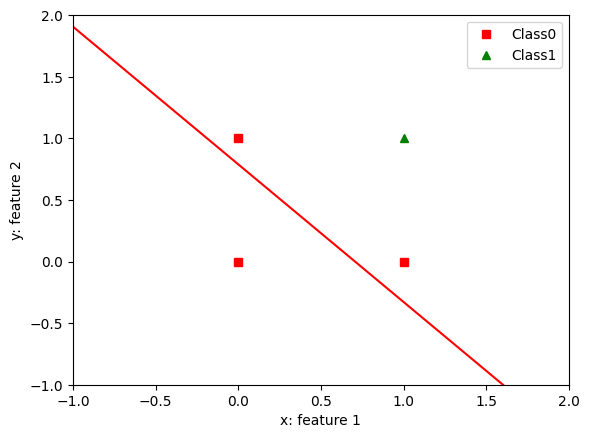

iteration #2


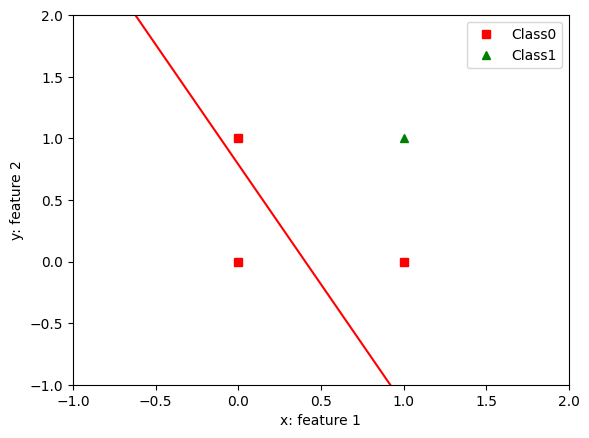

iteration #3


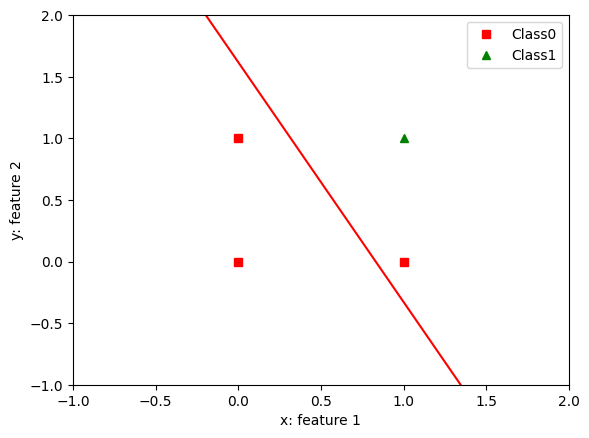

iteration #4


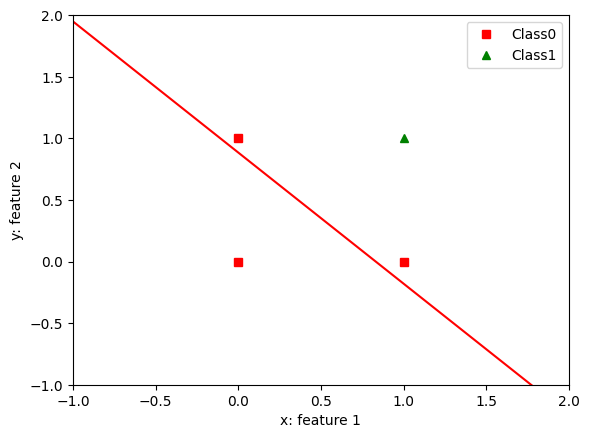

iteration #5


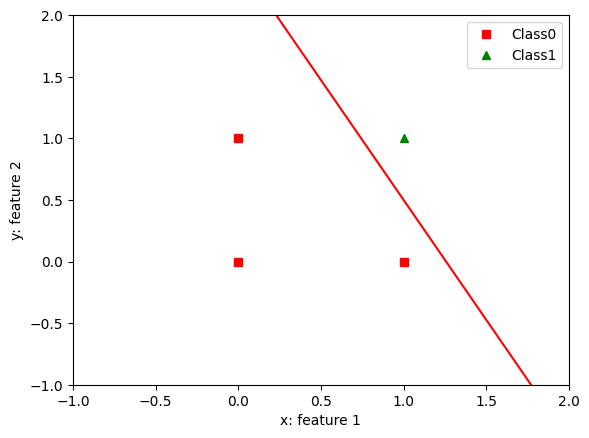

iteration #6


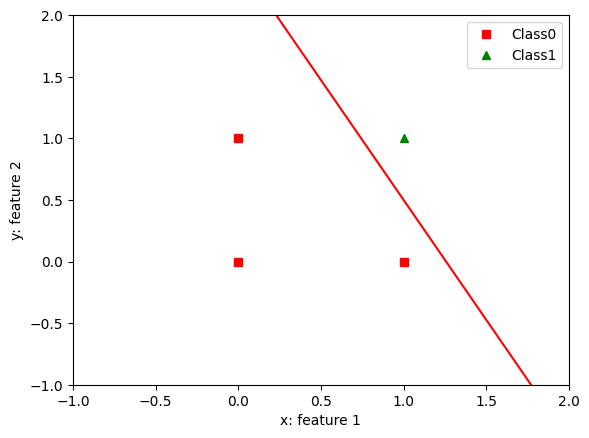

iteration #7


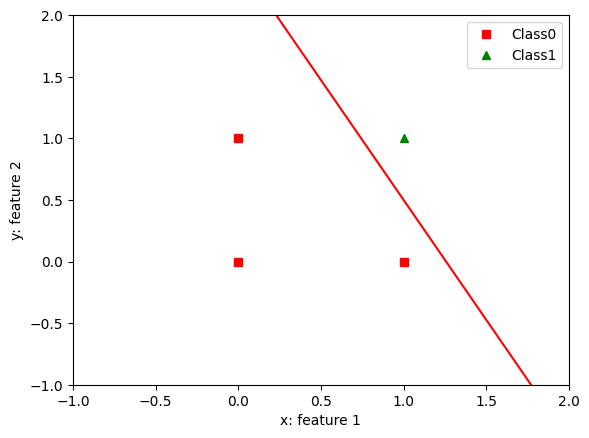

iteration #8


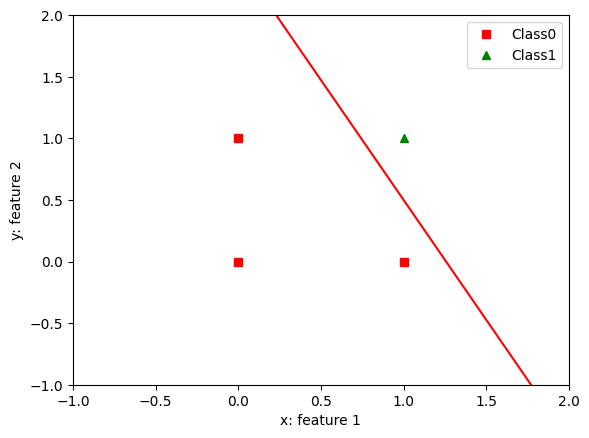

iteration #9


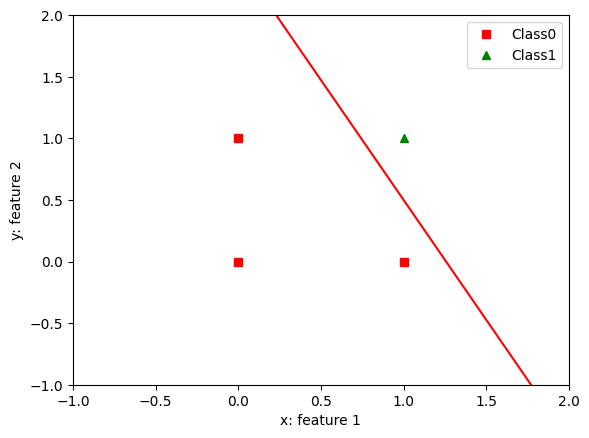

New weights after training
[[-2.9519622 ]
 [ 2.34820263]
 [ 1.20638473]]


In [50]:
neural_network = NeuralNetwork(2)
print('Random weights at the start of training')
print(neural_network.weight_matrix)
num_iterations=10
neural_network.train(features,labels,num_iterations)
print('New weights after training')
print(neural_network.weight_matrix)